# Homework #08
## Zhizhou Wang

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [7]:
life_exp = pd.read_csv("data2.csv")

In [9]:
life_exp.head()

,country,Life expectancy at birth (2015)-both sexes,Life expectancy at birth-female,Life expectancy at birth-male,Healthy life expectancy (HALE) at birth-both sexes
0,Afghanistan,60.5,61.9,59.3,52.2
1,Albania,77.8,80.7,75.1,68.8
2,Algeria,75.6,77.5,73.8,66.0
3,Angola,52.4,54.0,50.9,45.8
4,Antigua and Barbuda,76.4,78.6,74.1,67.5


In [10]:
life_exp.columns

Index(['country', 'Life expectancy at birth (2015)-both sexes',
       'Life expectancy at birth-female', 'Life expectancy at birth-male',
       'Healthy life expectancy (HALE) at birth-both sexes'],
      dtype='object')

### 1) What are the 5 countries with highest life expectancy at birth?

In [12]:
life_exp.sort_values(by='Life expectancy at birth (2015)-both sexes',ascending=False).head(5)

,country,Life expectancy at birth (2015)-both sexes,Life expectancy at birth-female,Life expectancy at birth-male,Healthy life expectancy (HALE) at birth-both sexes
82,Japan,83.7,86.8,80.5,74.9
157,Switzerland,83.4,85.3,81.3,73.1
144,Singapore,83.1,86.1,80.0,73.9
7,Australia,82.8,84.8,80.9,71.9
151,Spain,82.8,85.5,80.1,72.4


###  What are the 5 countries with highest health life expectancy at birth?

In [13]:
life_exp.sort_values(by='Healthy life expectancy (HALE) at birth-both sexes',ascending=False).head(5)

,country,Life expectancy at birth (2015)-both sexes,Life expectancy at birth-female,Life expectancy at birth-male,Healthy life expectancy (HALE) at birth-both sexes
82,Japan,83.7,86.8,80.5,74.9
144,Singapore,83.1,86.1,80.0,73.9
130,Republic of Korea,82.3,85.5,78.8,73.2
157,Switzerland,83.4,85.3,81.3,73.1
80,Italy,82.7,84.8,80.5,72.8


### 3) Male comparing to female?

In [15]:
life_exp['Life expectancy at birth-female'].describe()

count    183.000000
mean      73.734973
std        8.365745
min       50.800000
25%       67.350000
50%       76.100000
75%       79.350000
max       86.800000
Name: Life expectancy at birth-female, dtype: float64

In [16]:
life_exp['Life expectancy at birth-male'].describe()

count    183.000000
mean      68.876503
std        7.716583
min       49.300000
25%       63.250000
50%       70.100000
75%       74.100000
max       81.300000
Name: Life expectancy at birth-male, dtype: float64

In [41]:
sex_exp = merged[['Life expectancy at birth-female','Life expectancy at birth-male','country','Continent']]
sex_exp.head(2)

,Life expectancy at birth-female,Life expectancy at birth-male,country,Continent
0,61.9,59.3,Afghanistan,Asia
1,80.7,75.1,Albania,Europe


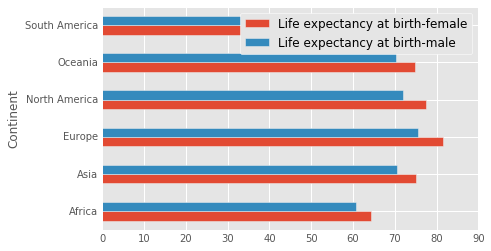

In [47]:
sex_exp.groupby('Continent').mean().plot(kind='barh')

### 4) Continent?

In [19]:
continent = pd.read_csv("Countries-Continents-csv.csv")
continent.head(2)

,Continent,Country
0,Africa,Algeria
1,Africa,Angola


In [21]:
merged = life_exp.merge(continent,left_on='country',right_on='Country')
merged.head(2)

,country,Life expectancy at birth (2015)-both sexes,Life expectancy at birth-female,Life expectancy at birth-male,Healthy life expectancy (HALE) at birth-both sexes,Continent,Country
0,Afghanistan,60.5,61.9,59.3,52.2,Asia,Afghanistan
1,Albania,77.8,80.7,75.1,68.8,Europe,Albania


In [23]:
merged.groupby("Continent").mean()

,Life expectancy at birth (2015)-both sexes,Life expectancy at birth-female,Life expectancy at birth-male,Healthy life expectancy (HALE) at birth-both sexes
Continent,,,,
Africa,62.461224,64.336735,60.604082,54.589796
Asia,72.697143,75.140000,70.442857,64.205714
Europe,78.679487,81.587179,75.679487,69.628205
North America,74.755000,77.510000,72.040000,65.545000
Oceania,72.466667,74.900000,70.188889,64.577778
South America,74.710000,77.700000,71.730000,65.630000


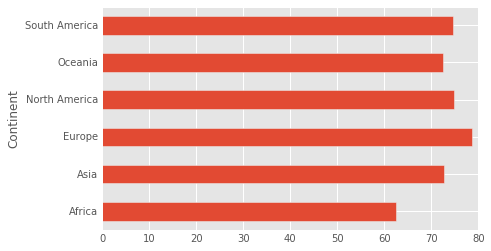

In [156]:
merged.groupby("Continent").mean().plot(kind='barh',y='Life expectancy at birth (2015)-both sexes',legend=False)

### 5) Join GDP

In [120]:
gdp = pd.read_csv('GDP.csv',encoding='mac_roman')
gdp.head(2)

,country code,Ranking,Economy,millions of US dollars
0,USA,1,United States,"17,419,000"
1,CHN,2,China,"10,354,832"


In [121]:
merged_gdp = merged.merge(gdp,left_on='country',right_on='Economy')
merged_gdp.head(2)

,country,Life expectancy at birth (2015)-both sexes,Life expectancy at birth-female,Life expectancy at birth-male,Healthy life expectancy (HALE) at birth-both sexes,Continent,Country,country code,Ranking,Economy,millions of US dollars
0,Afghanistan,60.5,61.9,59.3,52.2,Asia,Afghanistan,AFG,108,Afghanistan,"20,038"
1,Albania,77.8,80.7,75.1,68.8,Europe,Albania,ALB,127,Albania,"13,212"


### 6) Relationship between life expectancy and GDP

In [122]:
merged_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 11 columns):
country                                               151 non-null object
Life expectancy at birth (2015)-both sexes            151 non-null float64
Life expectancy at birth-female                       151 non-null float64
Life expectancy at birth-male                         151 non-null float64
Healthy life expectancy (HALE) at birth-both sexes    151 non-null float64
Continent                                             151 non-null object
Country                                               151 non-null object
country code                                          151 non-null object
Ranking                                               151 non-null int64
Economy                                               151 non-null object
millions of US dollars                                151 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 14.2+ KB


In [128]:
merged_gdp['millions of US dollars'].str.replace(',','').astype(int)
merged_gdp['gdp']=merged_gdp['millions of US dollars'].str.replace(',','').astype(int)

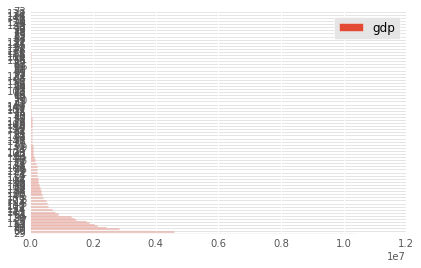

In [130]:
merged_gdp['gdp']
merged_gdp.sort_values(by='gdp',ascending=False).plot(kind='barh',y='gdp')

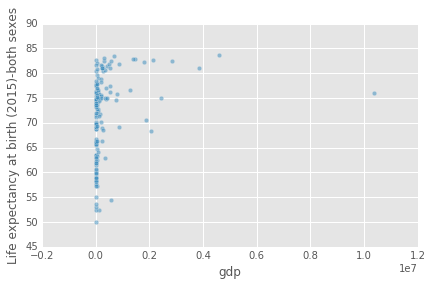

In [151]:
merged_gdp.plot(kind='scatter',x='gdp',y='Life expectancy at birth (2015)-both sexes',alpha='0.5')

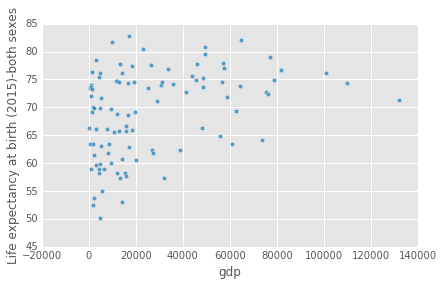

In [153]:
merged_gdp.sort_values(by='gdp').head(100).plot(kind='scatter',x='gdp',y='Life expectancy at birth (2015)-both sexes',alpha='0.8')

### 7) Relationship between health life expectancy and GDP

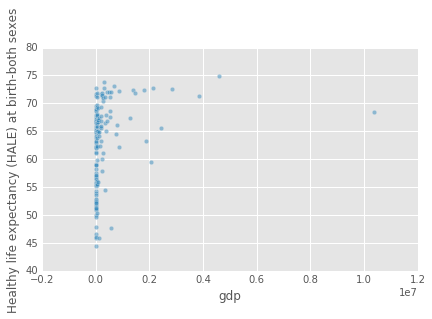

In [149]:
merged_gdp.sort_values(by='gdp').plot(kind='scatter',x='gdp',y='Healthy life expectancy (HALE) at birth-both sexes',alpha='0.5')

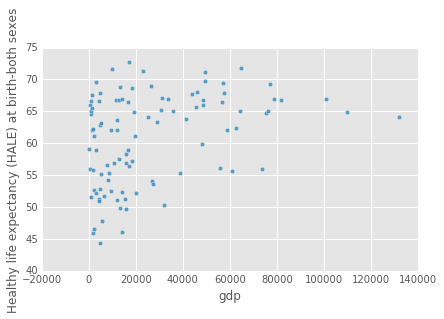

In [154]:
merged_gdp.sort_values(by='gdp').head(100).plot(kind='scatter',x='gdp',y='Healthy life expectancy (HALE) at birth-both sexes',alpha='0.8')

### Join air pollution

In [166]:
ap = pd.read_excel('pm25.xlsx',encoding='mac_roman')
ap.head(2)

,ID WHO city,Region,iso3,Country,City/Town,"Annual mean, ug/m3",Year,Number and type of monitoring stations (PM2.5),note on converted PM2.5
0,1,Emr LMI,AFG,Afghanistan,Kabul,86.0,2009.0,"1 station, 1 station: urban",measured data
1,2,Emr LMI,AFG,Afghanistan,Mazar-e Sharif,68.0,2009.0,"1 station, 1 station: urban outskirts",measured data


In [173]:
merged_ap = merged_gdp.merge(ap,on='Country')
merged_ap = merged_ap[['Country','country code','gdp','City/Town','City/Town','Annual mean, ug/m3','Year','Continent','Life expectancy at birth (2015)-both sexes']]
merged_ap.head()

,Country,country code,gdp,City/Town,City/Town,"Annual mean, ug/m3",Year,Continent,Life expectancy at birth (2015)-both sexes
0,Afghanistan,AFG,20038,Kabul,Kabul,86.000000,2009.0,Asia,60.5
1,Afghanistan,AFG,20038,Mazar-e Sharif,Mazar-e Sharif,68.000000,2009.0,Asia,60.5
2,Albania,ALB,13212,TIRANA,TIRANA,16.062366,2013.0,Europe,77.8
3,Argentina,ARG,537660,Buenos Aires,Buenos Aires,14.159593,2015.0,South America,76.3
4,Australia,AUS,1454675,Adelaide,Adelaide,7.100000,2014.0,Oceania,82.8


### 8) Relationship between continent and air pollution?

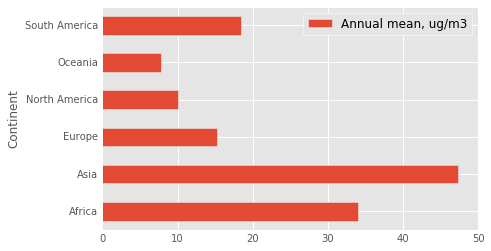

In [175]:
merged_ap.groupby('Continent').mean().plot(kind='barh',y='Annual mean, ug/m3')

### 9) air pollution by country?

Continent
Africa           [[Axes(0.08,0.125;0.87x0.775)]]
Asia             [[Axes(0.08,0.125;0.87x0.775)]]
Europe           [[Axes(0.08,0.125;0.87x0.775)]]
North America    [[Axes(0.08,0.125;0.87x0.775)]]
Oceania          [[Axes(0.08,0.125;0.87x0.775)]]
South America    [[Axes(0.08,0.125;0.87x0.775)]]
dtype: object

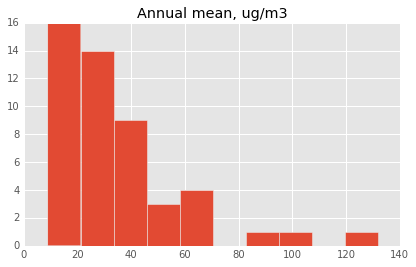

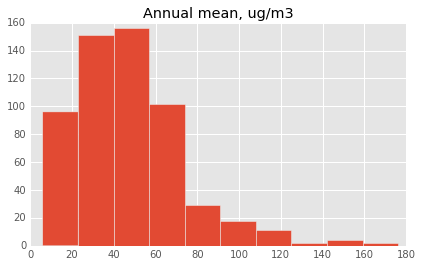

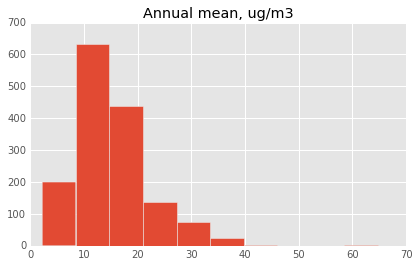

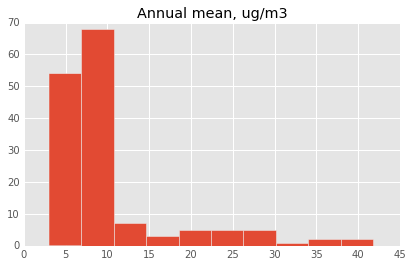

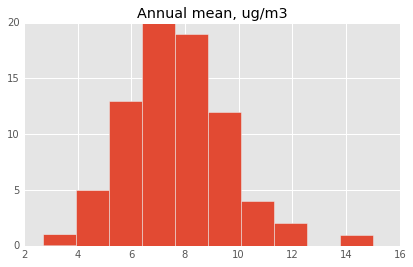

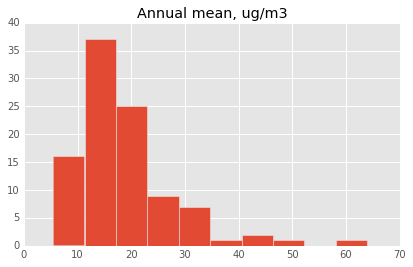

In [211]:
merged_ap.groupby('Continent').hist('Annual mean, ug/m3')

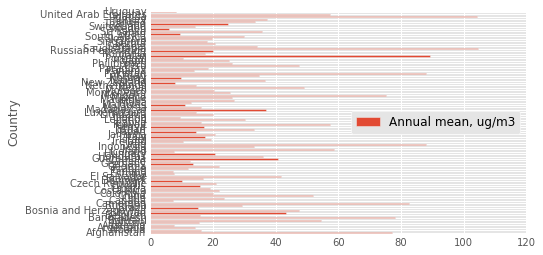

In [181]:
merged_ap.groupby('Country').mean().plot(kind='barh',y='Annual mean, ug/m3')

In [185]:
merged_ap.sort_values(by='Annual mean, ug/m3',ascending=False).head(10)

,Country,country code,gdp,City/Town,City/Town,"Annual mean, ug/m3",Year,Continent,Life expectancy at birth (2015)-both sexes
1269,India,IND,2048517,Gwalior,Gwalior,176.144902,2012.0,Asia,68.3
1234,India,IND,2048517,Allahabad,Allahabad,169.720164,2012.0,Asia,68.3
2056,Saudi Arabia,SAU,753832,Riyadh,Riyadh,155.511165,2014.0,Asia,74.5
2051,Saudi Arabia,SAU,753832,Al Jubail,Al Jubail,151.707903,2014.0,Asia,74.5
1317,India,IND,2048517,Patna,Patna,148.940000,2013.0,Asia,68.3
1321,India,IND,2048517,Raipur,Raipur,143.664282,2012.0,Asia,68.3
231,Cameroon,CMR,32051,Bamenda,Bamenda,132.000000,2012.0,Africa,57.3
554,China,CHN,10354832,Xingtai,Xingtai,128.000000,2014.0,Asia,76.1
384,China,CHN,10354832,Baoding,Baoding,126.000000,2014.0,Asia,76.1
1256,India,IND,2048517,Delhi,Delhi,122.105666,2013.2,Asia,68.3


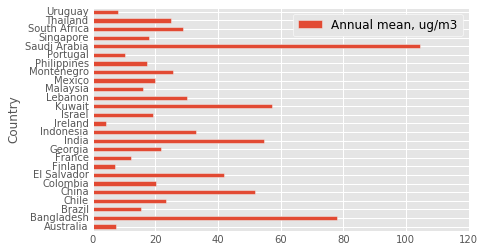

In [190]:
ap2014 = merged_ap[merged_ap['Year'] == 2014]
ap2014.groupby('Country').mean().plot(kind='barh',y='Annual mean, ug/m3')

### 10) Relationship between air pollution and GDP?

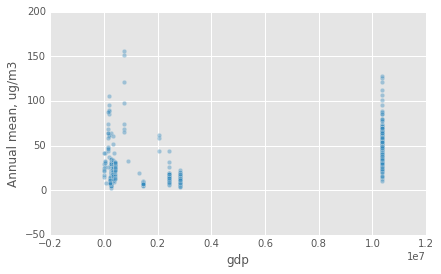

In [195]:
ap2014.plot(kind='scatter',x='gdp',y='Annual mean, ug/m3',alpha=0.4)

### 11) Inside a continent?

Continent
Africa           Axes(0.08,0.125;0.87x0.775)
Asia             Axes(0.08,0.125;0.87x0.775)
Europe           Axes(0.08,0.125;0.87x0.775)
North America    Axes(0.08,0.125;0.87x0.775)
Oceania          Axes(0.08,0.125;0.87x0.775)
South America    Axes(0.08,0.125;0.87x0.775)
dtype: object

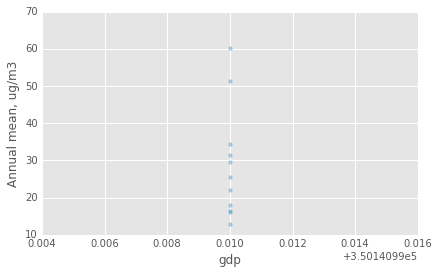

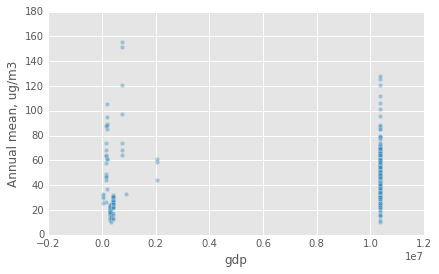

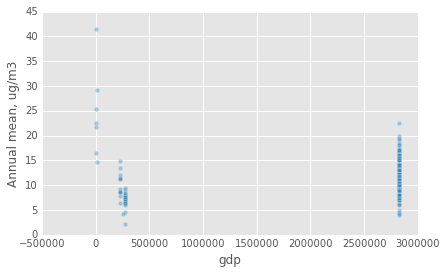

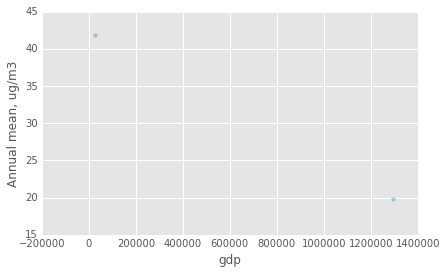

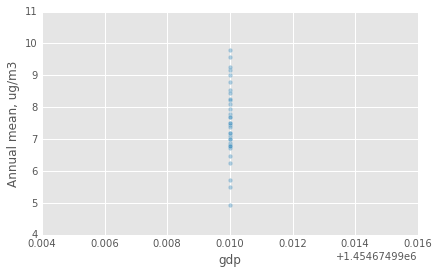

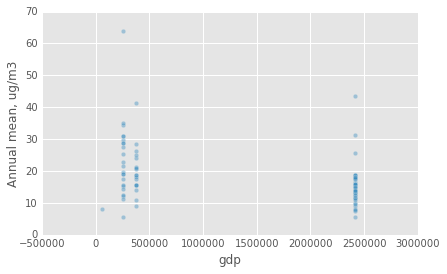

In [197]:
ap2014.groupby('Continent').plot(kind='scatter',x='gdp',y='Annual mean, ug/m3',alpha=0.4)

### 12) Inside China？

In [198]:
china = ap2014[ap2014['Country'] == 'China']

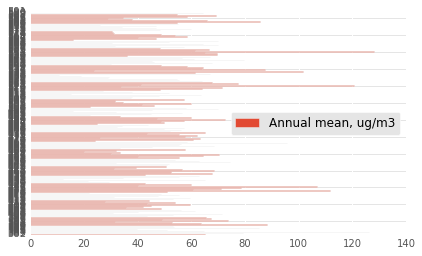

In [201]:
china.plot(kind='barh',y='Annual mean, ug/m3')

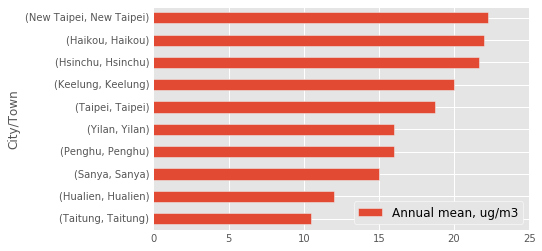

In [205]:
china.sort_values('Annual mean, ug/m3').head(10).plot(kind='barh',y='Annual mean, ug/m3',x='City/Town')

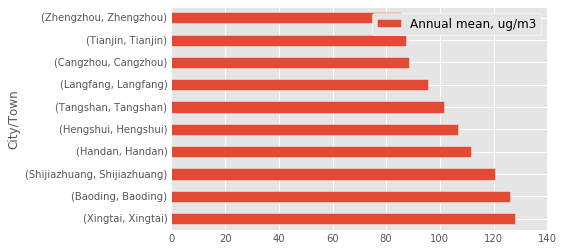

In [206]:
china.sort_values('Annual mean, ug/m3',ascending=False).head(10).plot(kind='barh',y='Annual mean, ug/m3',x='City/Town')